In [3]:
import pandas as pd
df = pd.read_excel('Cr-poisoning.xlsx')

In [9]:
import numpy as np

In [18]:
X1 = df['log pO2 /bar'].tolist()
X2 = df['log CrO3 /bar'].tolist()
X = np.c_[X1,X2]
y = df['reaction product']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [110]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = SVC(gamma=0.5, kernel='linear',C = 20)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 0, 0],
       [0, 6, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

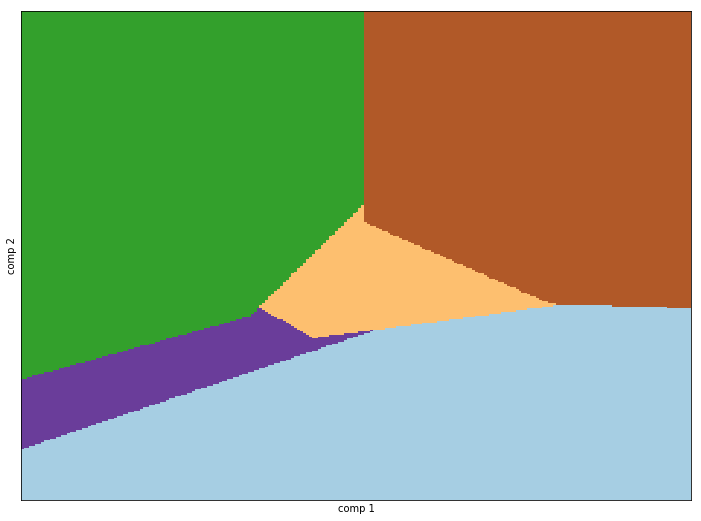

In [85]:
import matplotlib.pyplot as plt
from random import sample
idx = sample(list(df.index), int(df.shape[0]))
h = .02
x_min, x_max  = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
encoder = {'SrO': 1, 'SrCrO3': 2, 'Sr3Cr2O8': 3,'Sr2CrO4':4,'SrCrO4':5}
Z = np.array([encoder[z] for z in Z]).reshape(xx.shape)
plt.figure(figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
col_map = {'SrO': 'olive', 'SrCrO3': 'navy', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"blue",'SrCrO4':"yellow"}
plt.xlabel('comp 1')
plt.ylabel('comp 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [62]:
len(X_train[:, 0])

60

In [216]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [217]:
le = LabelEncoder()
le.fit(y_train)
y_tarin = le.transform(y_train)

In [308]:
y_test = le.transform(y_test)

In [218]:
y_tarin = np_utils.to_categorical(y_tarin)

In [297]:
model = Sequential()
model.add(Dense(5, input_shape = [2,], activation = 'tanh'))
model.add(Dense(5, activation = 'softmax'))

In [298]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [299]:
history = model.fit(X_train,y_tarin,epochs=100,batch_size = 4)

Epoch 1/100
60/60 [==============================] - 2s 27ms/step - loss: 1.3047 - acc: 0.3000
Epoch 2/100
60/60 [==============================] - 0s 550us/step - loss: 0.8319 - acc: 0.6500
Epoch 3/100
60/60 [==============================] - 0s 512us/step - loss: 0.6514 - acc: 0.7000
Epoch 4/100
60/60 [==============================] - 0s 518us/step - loss: 0.6923 - acc: 0.6333
Epoch 5/100
60/60 [==============================] - 0s 518us/step - loss: 0.6154 - acc: 0.7833
Epoch 6/100
60/60 [==============================] - 0s 449us/step - loss: 0.5740 - acc: 0.7500
Epoch 7/100
60/60 [==============================] - 0s 451us/step - loss: 0.4765 - acc: 0.7833
Epoch 8/100
60/60 [==============================] - 0s 459us/step - loss: 0.5609 - acc: 0.7167
Epoch 9/100
60/60 [==============================] - 0s 448us/step - loss: 0.5596 - acc: 0.7333
Epoch 10/100
60/60 [==============================] - 0s 448us/step - loss: 0.4274 - acc: 0.7667
Epoch 11/100
60/60 [====================

60/60 [==============================] - 0s 507us/step - loss: 0.0994 - acc: 0.9667
Epoch 86/100
60/60 [==============================] - 0s 521us/step - loss: 0.1133 - acc: 0.9333
Epoch 87/100
60/60 [==============================] - 0s 522us/step - loss: 0.0533 - acc: 0.9833
Epoch 88/100
60/60 [==============================] - 0s 505us/step - loss: 0.0458 - acc: 0.9833
Epoch 89/100
60/60 [==============================] - 0s 536us/step - loss: 0.0526 - acc: 0.9833
Epoch 90/100
60/60 [==============================] - 0s 528us/step - loss: 0.0583 - acc: 0.9667
Epoch 91/100
60/60 [==============================] - 0s 515us/step - loss: 0.0606 - acc: 0.9833
Epoch 92/100
60/60 [==============================] - 0s 529us/step - loss: 0.0570 - acc: 0.9833
Epoch 93/100
60/60 [==============================] - 0s 510us/step - loss: 0.0620 - acc: 0.9667
Epoch 94/100
60/60 [==============================] - 0s 501us/step - loss: 0.1372 - acc: 0.9500
Epoch 95/100
60/60 [=======================

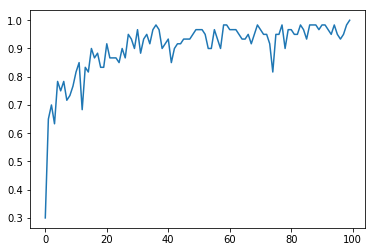

In [300]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
plt.plot(history.history['acc'])

In [303]:
y_pred

array([[3.6109951e-09, 5.4365546e-06, 4.9253581e-03, 9.9506927e-01,
        8.3528202e-12],
       [7.9932470e-06, 7.1891292e-05, 6.0334485e-13, 2.5659943e-09,
        9.9992013e-01],
       [1.4838842e-09, 4.6899436e-06, 1.2485043e-03, 9.9874675e-01,
        6.4061621e-12],
       [2.4257447e-06, 9.9603003e-01, 1.4386983e-06, 3.9638798e-03,
        2.2963579e-06],
       [1.2033124e-04, 9.9865013e-01, 2.8191693e-04, 9.4409316e-04,
        3.5762587e-06],
       [8.1037369e-06, 7.2737472e-05, 6.2408119e-13, 2.7282923e-09,
        9.9991918e-01],
       [8.5882390e-01, 6.1620322e-06, 1.4114083e-01, 1.3164248e-07,
        2.8926388e-05],
       [4.6109844e-07, 3.6833703e-07, 9.9898642e-01, 1.0127594e-03,
        9.9761312e-13],
       [6.3313502e-03, 9.8992097e-01, 3.6935264e-03, 5.0118593e-05,
        4.0500449e-06],
       [9.1099541e-04, 1.5622543e-02, 9.8344696e-01, 1.9170002e-05,
        1.8878396e-07],
       [3.7994905e-05, 1.7470840e-04, 9.9978656e-01, 7.0708768e-07,
        3.56

In [306]:
y_pred = [item.argmax() for item in y_pred]

In [309]:
accuracy_score(y_test, y_pred)

1.0

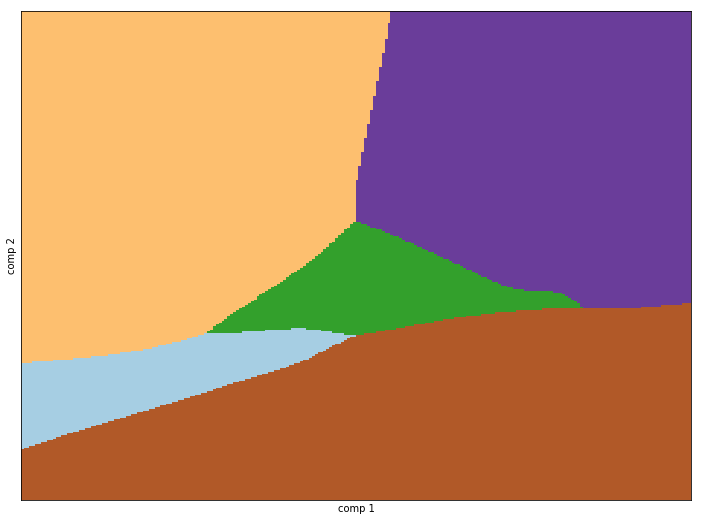

In [339]:
import matplotlib.pyplot as plt
from random import sample
idx = sample(list(df.index), int(df.shape[0]))
h = .02
x_min, x_max  = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([item.argmax() for item in Z]).reshape(xx.shape)
# #Put the result into a color plot
#encoder = {'SrO': 1, 'SrCrO3': 2, 'Sr3Cr2O8': 3,'Sr2CrO4':4,'SrCrO4':5}
#Z = np.array([encoder[z] for z in Z]).reshape(xx.shape)
plt.figure(figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
col_map = {'SrO': 'olive', 'SrCrO3': 'navy', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"blue",'SrCrO4':"yellow"}
#plt.scatter(X[:, 0], X[:, 1], c= [col_map[lb] for lb in df["reaction product"].ix[idx]], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('comp 1')
plt.ylabel('comp 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()